# 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

For multiplication of two matrices A(n, k)and B(k, m), first, the number of columns in the first matrix and the number of rows in the second matrix shoulb be equal, which her is 'k'.
Now, for each cell of the resultant matrix, suppose C, we need to calucalate as:
for every C[i][j], 
# $C[i][j] = \sum \limits _{r=1} ^{k} A[i][r] * B[r][j]$

that means for the cell value in resultant matrix C at i,j th position will be equal to the summation of the products of the i,r th element in the first matrix A and the r,j th element in the second matrix B for all the values of the r = [1, k].

Therefore for one element, there will be total of k multiplications and k-1 additions needed.
The resulant matrix C contains the order as (n, m) i.e., n*m elements.
#### Therefore for n x m elements we need a total of n x m x k multiplications and n x m x (k-1) additions.

# 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

Python Code for multiplication of two matrices using list of lists:

In [2]:
def mat_mul_li(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])

    C = [[0] * m for _ in range(n)]

    for i in range(n):
        for j in range(m):
            for r in range(k):
                C[i][j] += A[i][r] * B[r][j]

    return C

In [15]:
!pip install numpy
import numpy as np

def mat_mul_numpy(A, B):
    return np.dot(A,B)


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
n, k, m = 100, 100, 100
A = [[np.random.rand() for _ in range(k)] for _ in range(n)]
B = [[np.random.rand() for _ in range(k)] for _ in range(n)]

In [17]:
C = mat_mul_li(A, B)

In [14]:
C = mat_mul_numpy(A, B)

# 4. What is the gradient of the following function with respect to x and y?
# $f(x, y) = x^2 + y^3 sin(x)$

The partial derivation of function f with respect to x is:
# $\frac{\partial f(x, y)}{\partial x} = 2x + y^3 cos(x)$

The partial derivation of function f with respect to y is:
# $\frac{\partial f(x, y)}{\partial x} = 3y^2 sin(x)$

therefore,
# $ Grad(f(x, y)) = {2x + y^3 cos(x), 3y^2 sin(x)} $

# 5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

python code to evaluate the gradiant of the function

In [20]:
! pip install jax jaxlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import jax.numpy as jnp
from jax import grad
import random

def f(x, y):
    return x ** 2 + y ** 3 * jnp.sin(x)

def gradient(x, y):
    df_dx = 2 * x + (y ** 3) * jnp.cos(x)
    df_dy = 3 * (y  ** 2) * jnp.sin(x)
    return df_dx, df_dy

def jax_gradient(x, y):
    return grad(f, argnums=0)(x, y), grad(f, argnums=1)(x, y)

X = random.uniform(0, 10)
Y = random.uniform(0, 10)

gradient_val = gradient(X, Y)
jax_gradient_val = jax_gradient(X, Y)

print(gradient_val)
print(jax_gradient_val)

(Array(329.53958, dtype=float32, weak_type=True), Array(231.26015, dtype=float32, weak_type=True))
(Array(329.53958, dtype=float32, weak_type=True), Array(231.26013, dtype=float32, weak_type=True))


# 6. Use sympy to confirm that you obtain the same gradient analytically.



In [30]:
!pip install sympy

   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB 262.6 kB/s eta 0:00:24
   ---------------------------------------- 0.0/6.2 MB 281.8 kB/s eta 0:00:22
    --------------------------------------- 0.1/6.2 MB 476.3 kB/s eta 0:00:13
   - -------------------------------------- 0.3/6.2 MB 1.1 MB/s eta 0:00:06
   --- ------------------------------------ 0.6/6.2 MB 2.3 MB/s eta 0:00:03
   ------- -------------------------------- 1.2/6.2 MB 3.6 MB/s eta 0:00:02
   --------- ------------------------------ 1.4/6.2 MB 3.9 MB/s eta 0:00:02
   ------------- -------------------------- 2.1/6.2 MB 5.0 MB/s eta 0:00:01
   ----------------- ---------------------- 2.7/6.2 MB 5.8 MB/s eta 0:00:01
   --------------------- ---------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import sympy as sp

x, y = sp.symbols('x y')

f = x ** 2 + y ** 3 * sp.sin(x)
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

sp_gradient_val = (df_dx, df_dy)
print(sp_gradient_val)


(2*x + y**3*cos(x), 3*y**2*sin(x))


# 7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
    1. Branch 1
        1. Roll Number: 1, Name: N, Marks:
            1. Maths: 100, English: 70 …
    2. Branch 2
2. 2023
    1. Branch 1
    2. Branch 2
3. 2024
    1. Branch 1
    2. Branch 2
4. 2025
    1. Branch 1
    2. Branch 2

In [42]:
students = {}

def add_student(year, branch, roll_number, name, marks):
    if year not in students:
        students[year] = {}
    if branch not in students[year]:
        students[year][branch] = {}
    students[year][branch]['Roll_number'] = roll_number
    students[year][branch]['Name'] = name
    students[year][branch]['Marks'] = marks

add_student(2024, "AI", 1, "Uday", {"Maths": 88, "English": 90, "Science": 85})
print(students)


{2024: {'AI': {'Roll_number': 1, 'Name': 'Uday', 'Marks': {'Maths': 88, 'English': 90, 'Science': 85}}}}


# 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

# $$ y = x $$

In [43]:
!pip install matplotlib

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.9 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.9 kB 393.8 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.9 kB 393.8 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.9 kB 393.8 kB/s eta 0:00:01
     ------------------------------- ---- 143.4/165.9 kB 607.9 kB/s eta 0:00:01
     -----------------------------------  163.8/165.9 kB 577.4 kB/s eta 0:00:01
     ------------------------------------ 165.9/165.9 kB 554.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.2/8.0 MB 3.5 MB/s eta 0:00:03
    --------------------------------------- 0.2/8.0 MB 3.5 MB/s eta 0:00:03
    --------------------------------------- 0.2/8.0 MB 3.5 MB/s eta 0:00:03
    --------------------------------------- 0.2/8.0 MB 1.1 MB/s eta 0:00:08



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


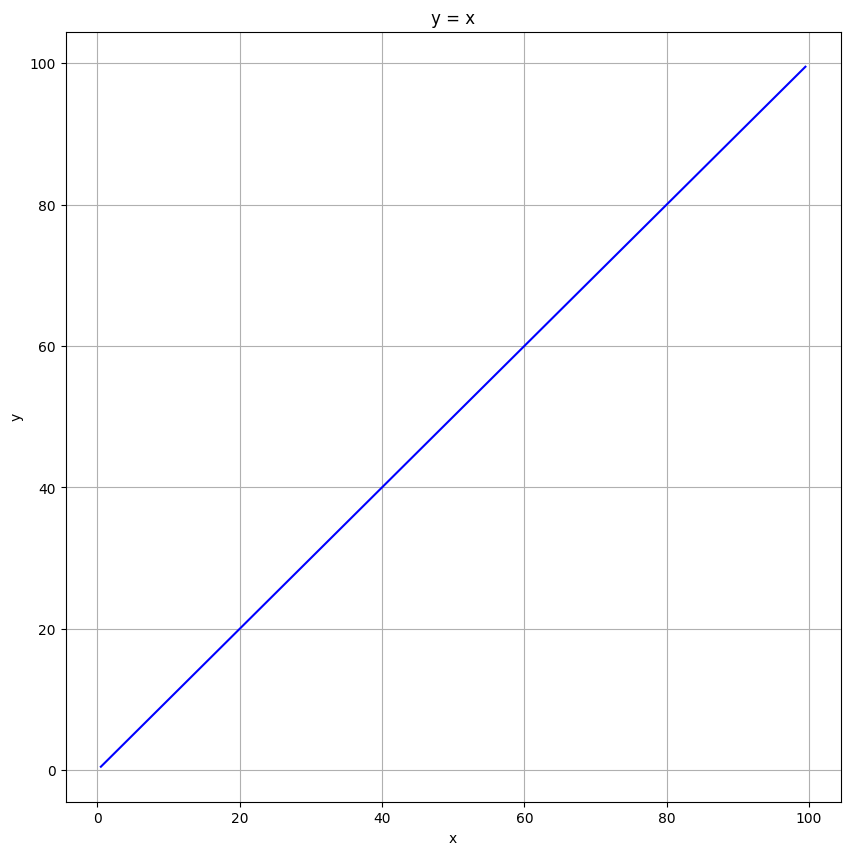

In [50]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100, 0.5)
f1 = x
plt.figure(figsize=(10, 10))
plt.plot(x, f1, color = 'blue')
plt.title('y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

# $$ y = x^2 $$

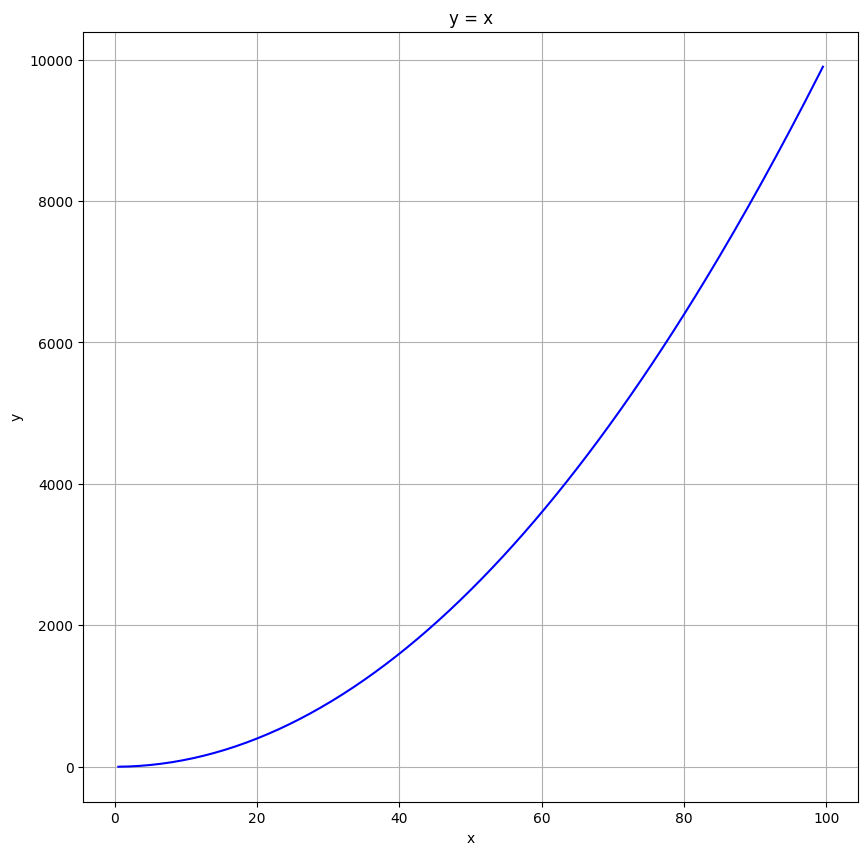

In [51]:
f2 = x**2
plt.figure(figsize=(10, 10))
plt.plot(x, f2, color = 'blue')
plt.title('y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

# $$ y = \frac{x^2} {100} $$ 

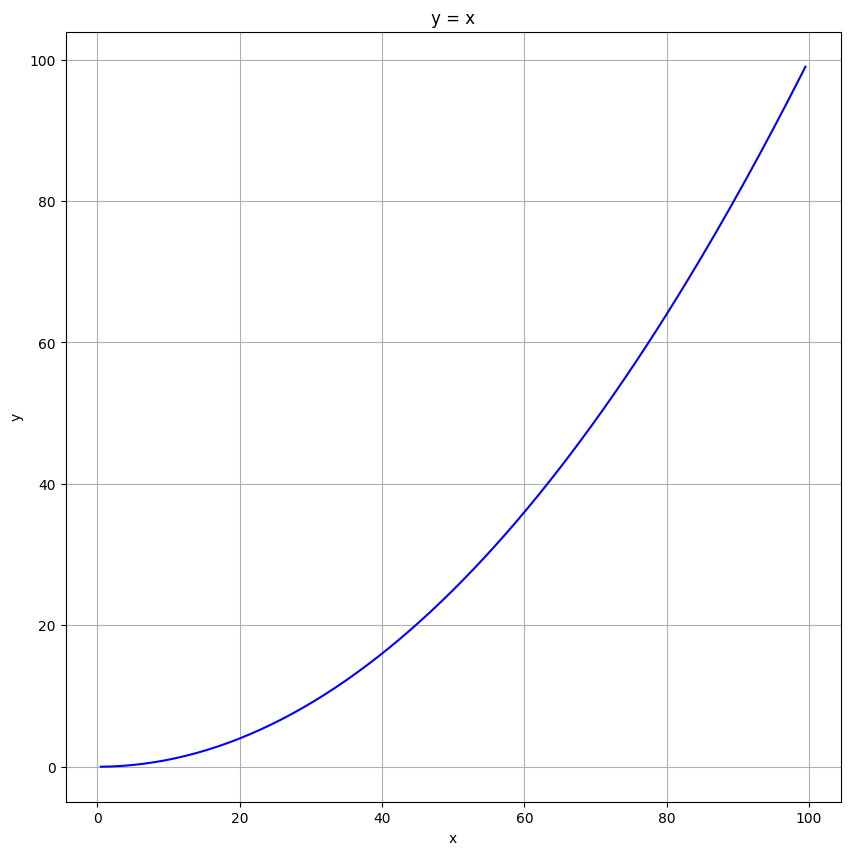

In [55]:
f3 = (x**2) / 100
plt.figure(figsize=(10, 10))
plt.plot(x, f3, color = 'blue')
plt.title('y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

# $$ y = sin(x) $$

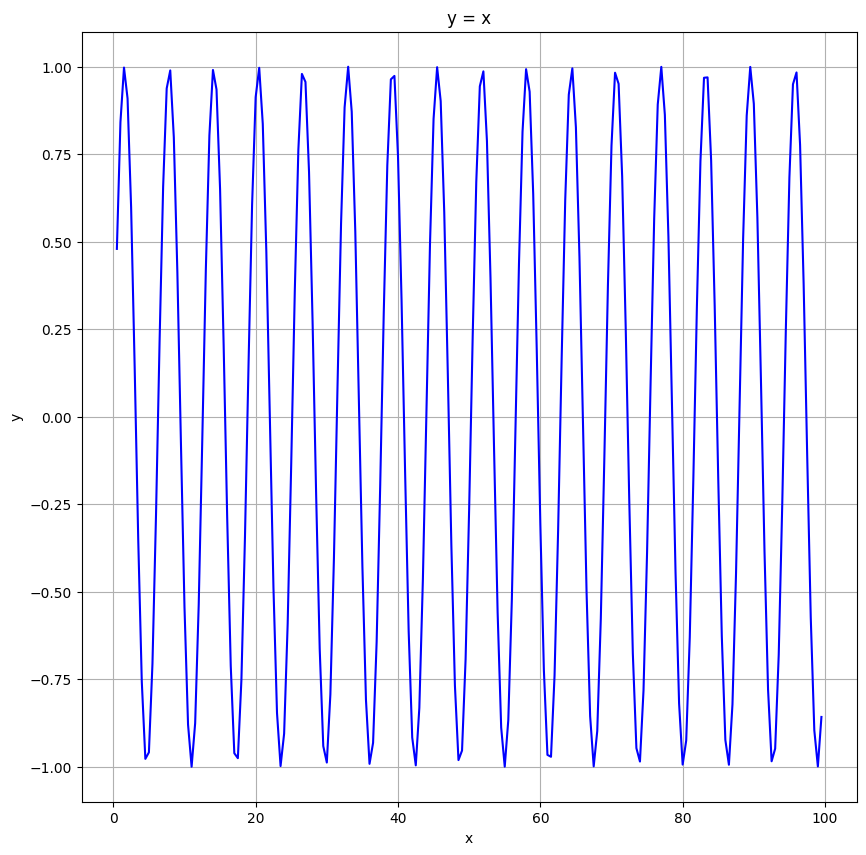

In [56]:
f4 = np.sin(x)
plt.figure(figsize=(10, 10))
plt.plot(x, f4, color = 'blue')
plt.title('y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

# $$ y = \frac{sin(x)}{x} $$

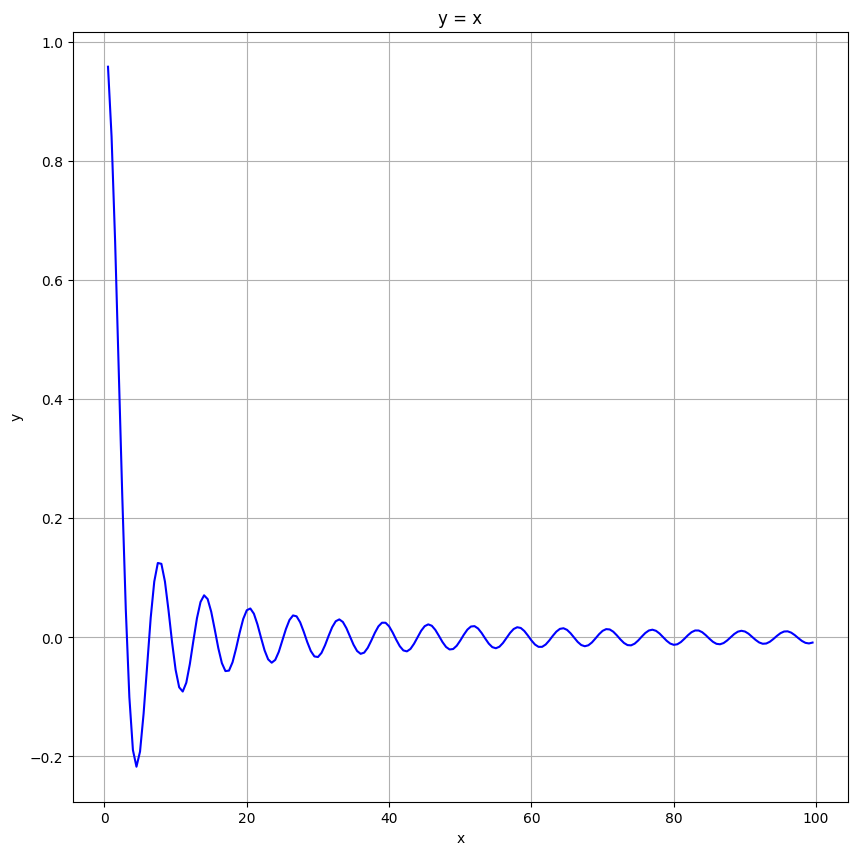

In [57]:
f5 = np.sin(x)/x
plt.figure(figsize=(10, 10))
plt.plot(x, f5, color = 'blue')
plt.title('y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

# $$ y = log(x) $$

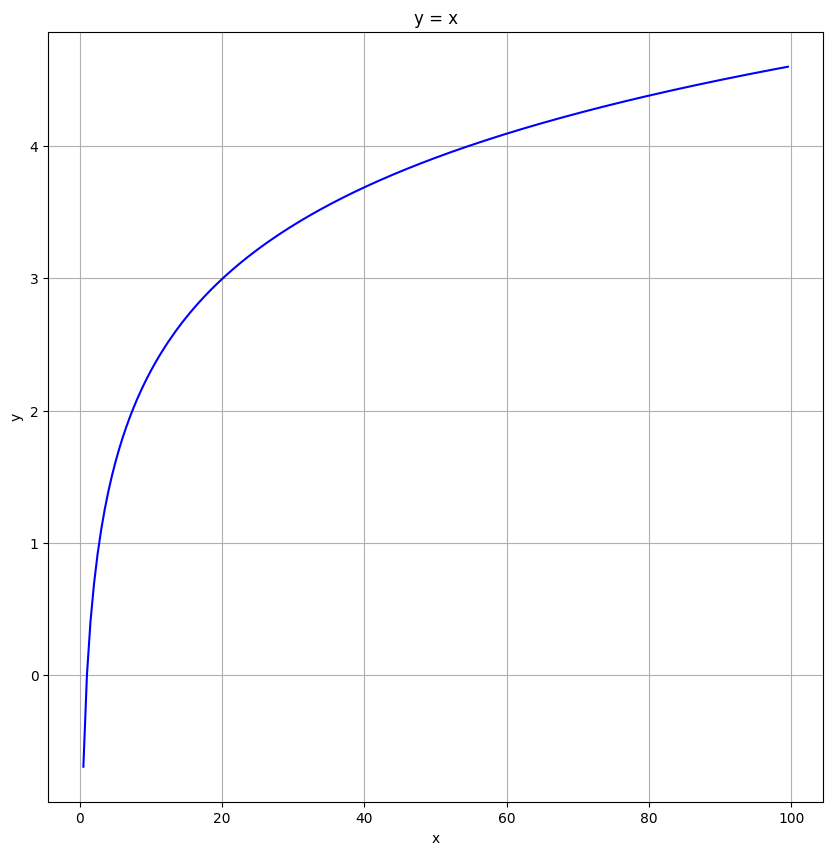

In [58]:
f6 = np.log(x)
plt.figure(figsize=(10, 10))
plt.plot(x, f6, color = 'blue')
plt.title('y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

# $$ y = e^x $$

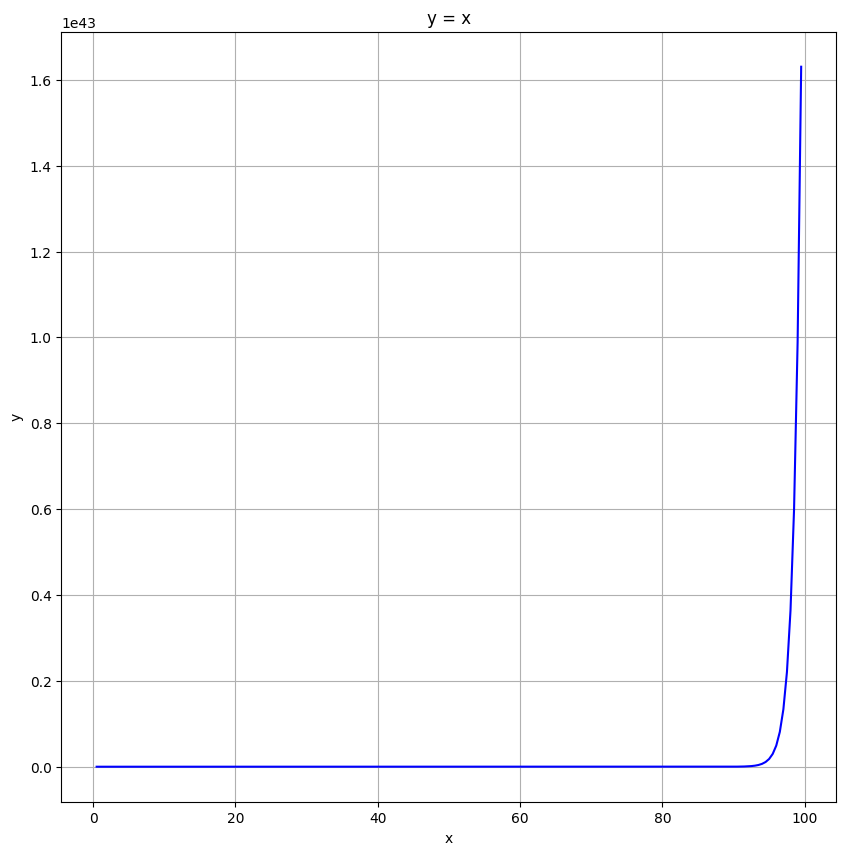

In [59]:
f7 = np.exp(x)
plt.figure(figsize=(10, 10))
plt.plot(x, f7, color = 'blue')
plt.title('y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

# 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [60]:
!pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB 100.9 kB/s eta 0:01:54
   ---------------------------------------- 0.0/11.5 MB 100.9 kB/s eta 0:01:54
   ---------------------------------------- 0.0/11.5 MB 109.3 kB/s eta 0:01:45
   ---------------------------------------- 0.0/11.5 MB 109.3 kB/s eta 0:01:45
   ---------------------------------------- 0.1/11.5 MB 136.5 kB/s eta 0:01:24
   ---------------------------------------- 0.1/11.5 MB 136.5 kB/s eta 0:01:24
   ---------------------------------------- 0.1/11.5 MB 136.5 kB/s eta 0:01:24
   ------------------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
import numpy as np
import pandas as pd

mat = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(mat, columns = ['a', 'b', 'c', 'd', 'e'])

std = df.std()
max_std_col = std.idxmax()
max_std_val = std.max()

mean = df.mean(axis = 1)
min_mean_row = mean.idxmin()
min_mean_row_val = mean.values.min()

print(f"highest standard deviation column is {max_std_col} with deviation of {max_std_val}")
print(f"lowest mean row is {min_mean_row}")
print(df.iloc[min_mean_row_val])

highest standard deviation column is d with deviation of 0.2922676641913423
lowest mean row is 13


TypeError: Cannot index by location index with a non-integer key